# Assignment_3 SVM

**Name**: Yara Hossam El-Din

**Sec**: 2

**BN**: 48

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# Part 2: SVM

### Use the following function to plot the classification regions

In [2]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = int(np.amax(y) +1)
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

In [5]:
from sklearn.svm import SVC
svc = SVC(kernel ='linear').fit(X_train,y_train)

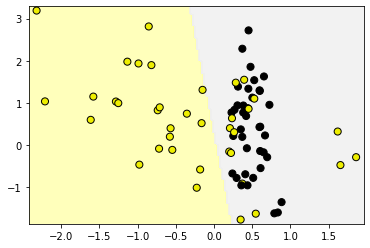

In [6]:
plot_class_regions_for_classifier(svc, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

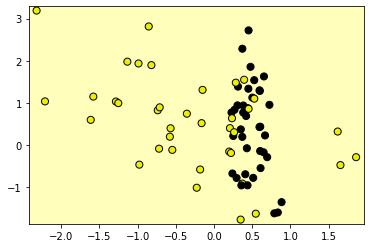

In [7]:
svc1 = SVC(kernel ='linear',C=0.00001).fit(X_train,y_train)
plot_class_regions_for_classifier(svc1, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)

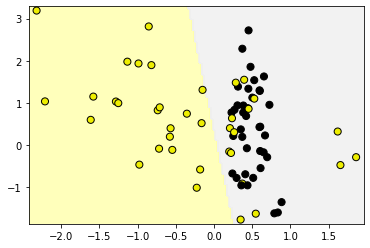

In [8]:
svc2 = SVC(kernel ='linear',C=100).fit(X_train,y_train)
plot_class_regions_for_classifier(svc2, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)

### Use the fruits dataset in questions 4, 5, 6.

In [9]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

In [10]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [11]:
X_fruits = fruits.iloc[:,3:]
y_fruits = fruits.iloc[:,0].values

In [12]:
X_fruits = X_fruits.iloc[:,1:3].values

In [13]:
X_fruits

array([[ 8.4,  7.3],
       [ 8. ,  6.8],
       [ 7.4,  7.2],
       [ 6.2,  4.7],
       [ 6. ,  4.6],
       [ 5.8,  4.3],
       [ 5.9,  4.3],
       [ 5.8,  4. ],
       [ 7.1,  7.8],
       [ 7.4,  7. ],
       [ 6.9,  7.3],
       [ 7.1,  7.6],
       [ 7. ,  7.1],
       [ 7.3,  7.7],
       [ 7.6,  7.3],
       [ 7.7,  7.1],
       [ 7.6,  7.5],
       [ 7.5,  7.6],
       [ 7.5,  7.1],
       [ 7.4,  7.2],
       [ 7.5,  7.5],
       [ 7.4,  7.4],
       [ 7.3,  7.1],
       [ 7.6,  7.9],
       [ 9. ,  9.4],
       [ 9.2,  9.2],
       [ 9.6,  9.2],
       [ 7.5,  9.2],
       [ 6.7,  7.1],
       [ 7. ,  7.4],
       [ 7.1,  7.5],
       [ 7.8,  8. ],
       [ 7.2,  7. ],
       [ 7.5,  8.1],
       [ 7.6,  7.8],
       [ 7.1,  7.9],
       [ 7.1,  7.6],
       [ 7.3,  7.3],
       [ 7.2,  7.8],
       [ 6.8,  7.4],
       [ 7.1,  7.5],
       [ 7.6,  8.2],
       [ 7.2,  7.2],
       [ 7.2, 10.3],
       [ 7.3, 10.5],
       [ 7.2,  9.2],
       [ 7.3, 10.2],
       [ 7.3,

In [14]:
y_fruits

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [15]:
X_fruits_train, X_fruits_test, y_fruits_train, y_fruits_test = train_test_split(X_fruits, y_fruits, test_size=0.25, random_state=0)

In [16]:
from sklearn.svm import LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(X_fruits_train,y_fruits_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [17]:
# 4 models because we have 4 different categories, a model for each category vs all
print("intercepts: ",linear_svc.intercept_)
print("coeffs: ",linear_svc.coef_)

intercepts:  [-1.54174281  0.78671606 -1.70952349  0.37197993]
coeffs:  [[ 0.47601232 -0.27448213]
 [ 0.78989692 -1.10771485]
 [ 0.20229368 -0.02647841]
 [-1.26172757  1.01060162]]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

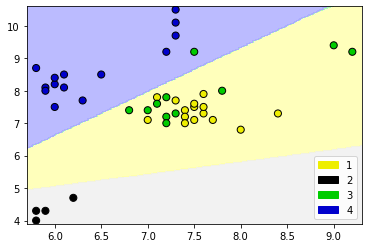

In [18]:
plot_class_regions_for_classifier(linear_svc,X_fruits_train ,y_fruits_train, X_test=None, y_test=None, title=None, target_names = [1,2,3,4], plot_decision_regions = True)


from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [19]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [20]:
# a helpful link: https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

In [21]:
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=0)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf=SVC()

parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
gd_sr = GridSearchCV(estimator=clf,
                     param_grid=parameters,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_cancer_train, y_cancer_train)
best_parameters = gd_sr.best_params_
print(best_parameters)


{'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [22]:
clf=SVC(C= 10, kernel= 'rbf')
clf.fit(X_cancer_train,y_cancer_train)
print("training accuracy: ",clf.score(X_cancer_train,y_cancer_train))
print("testing accuracy: ",clf.score(X_cancer_test,y_cancer_test))



training accuracy:  0.9154929577464789
testing accuracy:  0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
stf_clf = make_pipeline(StandardScaler(), SVC(C= 10, kernel= 'rbf'))
stf_clf.fit(X_cancer_train, y_cancer_train)
print("training accuracy: ",stf_clf.score(X_cancer_train,y_cancer_train))
print("testing accuracy: ",stf_clf.score(X_cancer_test,y_cancer_test))

training accuracy:  0.9882629107981221
testing accuracy:  0.993006993006993
